In [1]:
import csv
import matplotlib.pyplot as plt
import sys
sys.path.append('/public4/home/sc57082/local/pygadgetreader')
sys.path.append('/public4/home/sc57082/local')
import readgadget as rg 
import numpy as np
from scipy.spatial import cKDTree


import glio 
import matplotlib.pyplot as plt

In [1]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

(100000,)


(-40.0, 40.0)

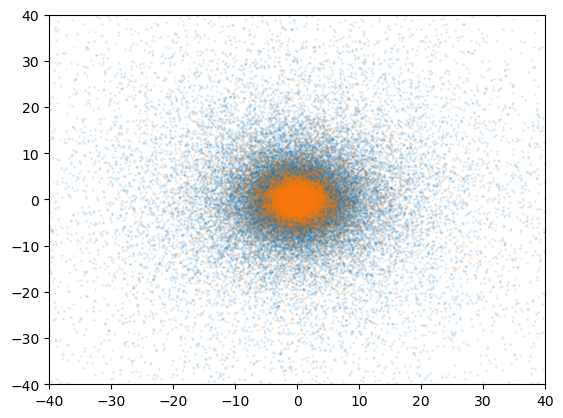

In [3]:

snapfname =  '/public4/home/sc57082/GC/ICs/core/curve_8sun.txt'
s = glio.GadgetSnapshot(snapfname)
s.load()
pbulge = s.pos[3]
mbulge = s.mass[3]
phalo = s.pos[1]
mhalo = s.mass[1]
vbulge = s.vel[3]
#potbulge = rg.readsnap(snapfname, 'pot', 'bulge')
plt.scatter(phalo[:,0],phalo[:,1],s=1,alpha = 0.1)
plt.scatter(pbulge[:,0],pbulge[:,1],s=1,alpha = 0.1)
print(mhalo.shape)
plt.xlim(-40,40)
plt.ylim(-40,40)

[ 0.02043242 -0.02272949 -0.01346839]
[0.00314189 0.00146509 0.00021872]
73376558.0358181 4901711.978746448


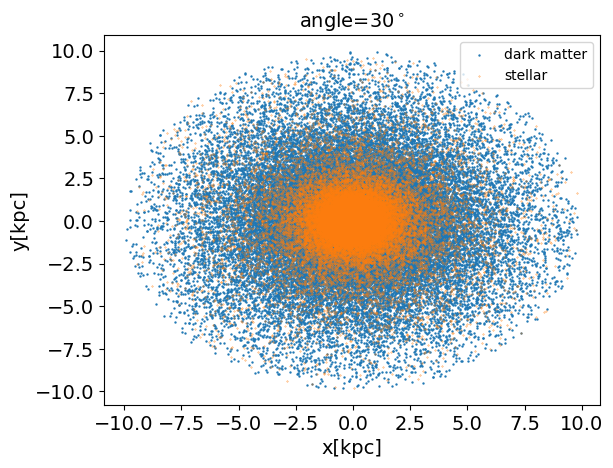

In [5]:

def cent_h(X):


    # 构建 KD 树
    tree = cKDTree(X)  

    # 为每个点查询最近的30个邻居点
    dist, ind = tree.query(X, k=10)  

    # 计算局部密度
    epsilon = 1e-5
    rho = 1 / (dist + epsilon).sum(axis=1)

    # 密度最大值点的索引
    densest_idx = np.argmax(rho)

    return X[densest_idx]
cent = cent_h(pbulge)
rhalo_cen = (((phalo-cent)**2).sum(-1))**0.5
rbulge_cen = (((pbulge-cent)**2).sum(-1))**0.5
vgal = np.mean(vbulge[rbulge_cen <= 1., :], axis=0)
print(vgal)
print(cent)
rhalo_cen = (((phalo-cent)**2).sum(-1))**0.5
rbulge_cen = (((pbulge-cent)**2).sum(-1))**0.5
bound_halo = phalo[rhalo_cen<10] - cent
bound_bulge = pbulge[rbulge_cen<10] - cent
plt.scatter(bound_halo[:,0],bound_halo[:,1],s=0.5,label='dark matter')
plt.scatter(bound_bulge[:,0],bound_bulge[:,1],s=0.08,label='stellar')

plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x[kpc]',fontsize =14)
plt.ylabel('y[kpc]',fontsize = 14)
plt.title('angle=$30^\circ$',fontsize=14)
GC_dmass = mhalo[0]*len(bound_halo)*1e10
GC_bulmass = mbulge[0]*len(bound_bulge)*1e10

print(GC_dmass,GC_bulmass)

Text(0, 0.5, 'mass[$M_\\odot$]')

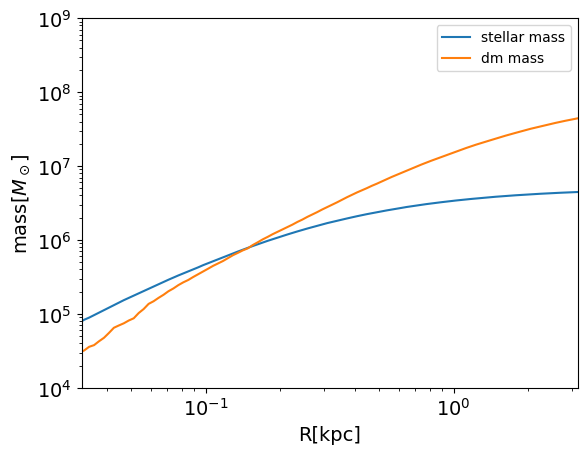

In [6]:
r_bulge = rbulge_cen[rbulge_cen<10]
m_bulge = mbulge[rbulge_cen<10]
r_halo = rhalo_cen[rhalo_cen<10]
m_halo = mhalo[rhalo_cen<10]
m_b = np.zeros(150)
m_dm = np.zeros_like(m_b) 
m_total= np.zeros_like(m_b) 
r = np.zeros_like(m_b)
for i in range(0,150,1):
    j=i/50-2
    m_b[i] = m_bulge[r_bulge<=10**(j+0.01)].sum()*1e10
    m_dm[i] =  m_halo[r_halo<=10**(j+0.01)].sum()*1e10
    m_total[i] = m_b[i]+m_dm[i]
    r[i] = 10**(j+0.01)
plt.plot(r,m_b,label = 'stellar mass',)
plt.plot(r,m_dm,label = 'dm mass')
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-1.5),10**(0.5))
plt.ylim(1e4,1e9)
plt.xlabel('R[kpc]',fontsize =14)
plt.ylabel('mass[$M_\odot$]',fontsize = 14)
#plt.title('angle=$30^\circ$',fontsize=14)

Text(0, 0.5, 'density[$M_\\odot/kpc^3$]')

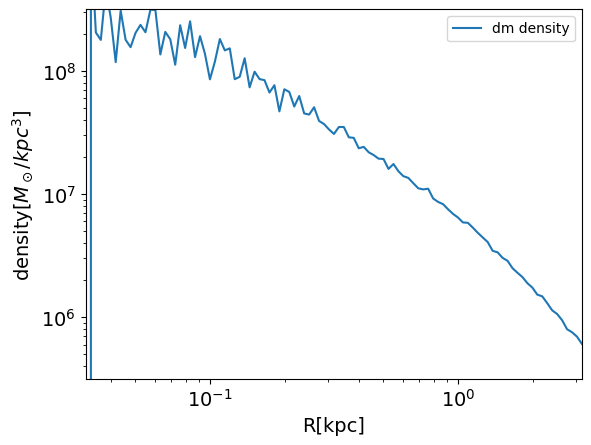

In [19]:
rho = np.zeros_like(m_b-1)
R = np.zeros_like(m_b-1)
for i in range(0,150-1,1):
    rho[i]=(m_dm[i+1]-m_dm[i])*3/4/np.pi/(r[i+1]**3-r[i]**3)
    R[i]=(r[i]+r[i+1])/2
plt.plot(R,rho,label = 'dm density')
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-1.5),10**(0.5))
plt.ylim(10**(5.5),10**(8.5))
plt.xlabel('R[kpc]',fontsize =14)
plt.ylabel('density[$M_\odot/kpc^3$]',fontsize = 14)

In [7]:
10**-0.5

0.31622776601683794